In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Exercise 10

In [4]:
pos = np.loadtxt('DATA/no_migration/cities.dat')

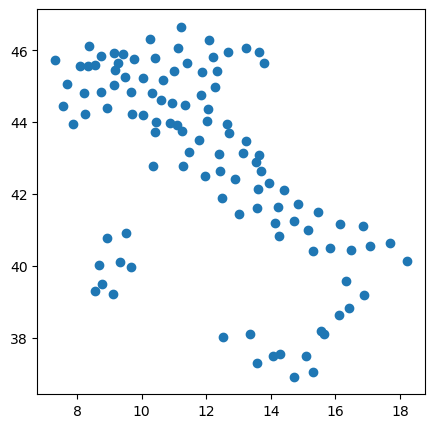

In [6]:
plt.figure(figsize=(5,5))
plt.plot(pos[:,0], pos[:,1], 'o')

## Non communicating parrallel processes

In [30]:
def make_plot(ax, x, y):
    ax.plot(x, y, marker='o')
    ax.plot(x[0], y[0], marker='o')

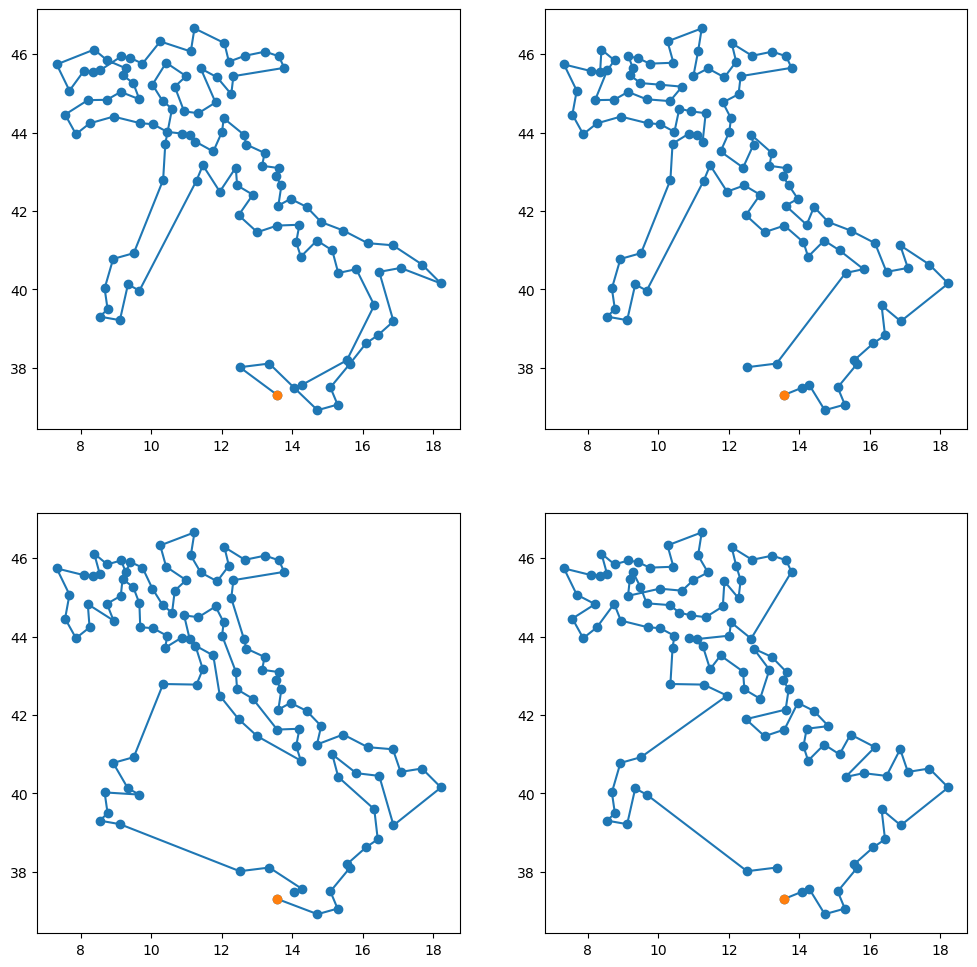

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs_tags=[(0,0),(0,1),(1,0),(1,1)]

for i in range(4):
    last_gen = []
    with open('DATA/no_migration/best_path_steps_'+str(i)+'.dat', 'r') as file:
        lines = file.readlines()
        # Get the specific line, strip any leading/trailing whitespace, and split by space
        last_gen = lines[len(lines)-1].strip().split(" ")

    last_path=np.zeros(shape=(len(last_gen),2))
    for j in range(len(last_gen)):
        city=int(last_gen[j])
        last_path[j,:]=pos[city,:]
        
    make_plot(axs[axs_tags[i]], last_path[:,0], last_path[:,1])

In [46]:
def make_graph(ax, x, y):
    ax.plot(x, y, label='Non communicating processes, best individual')
    ax.set_xlabel('# Generation')
    ax.set_ylabel('Total distance')
    ax.grid(True)

72.0668
70.2654
70.6662
70.6727


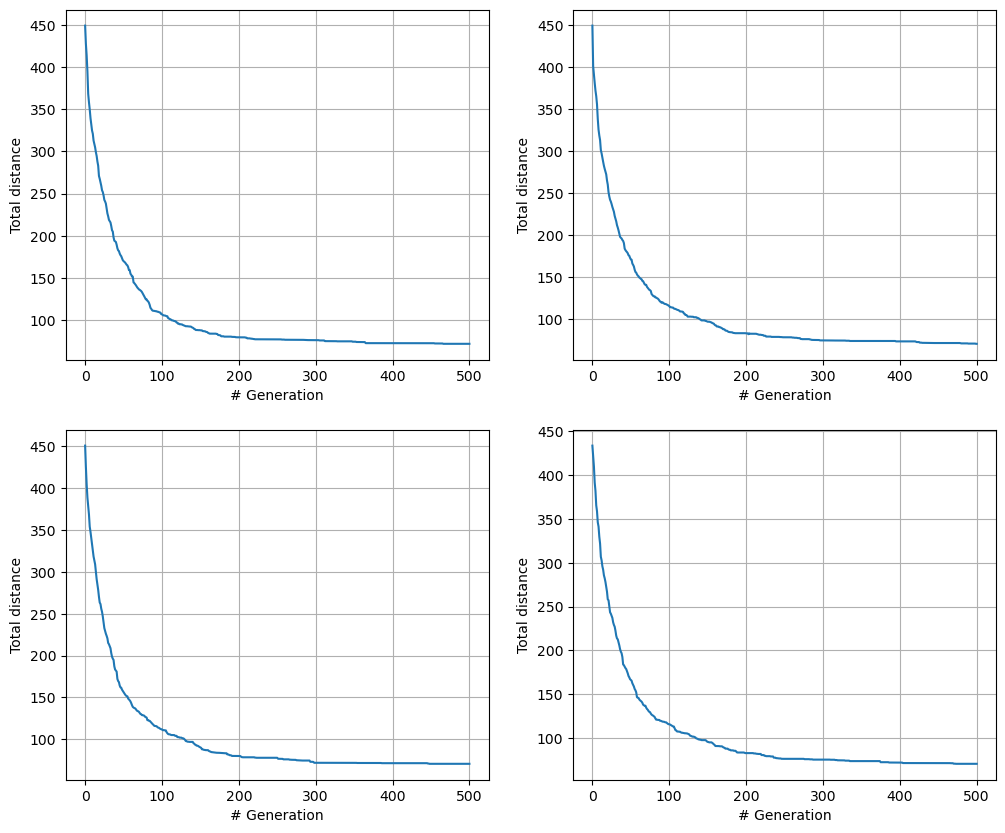

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    best=np.loadtxt('DATA/no_migration/best_individual_'+str(i)+'.dat')
    x=np.arange(best.size)
    
    make_graph(axs[axs_tags[i]], x, best)
    print(best[best.size-1])
    
plt.show()

## Communicating processes

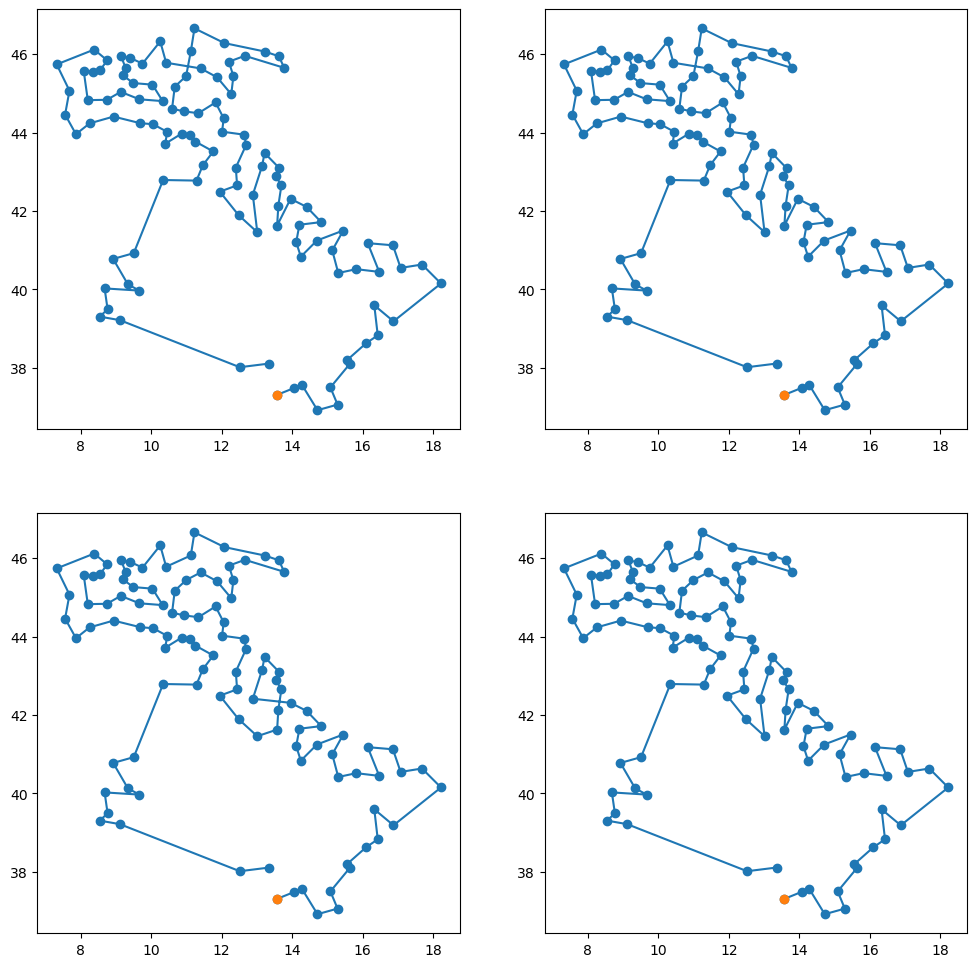

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs_tags=[(0,0),(0,1),(1,0),(1,1)]

for i in range(4):
    last_gen = []
    with open('DATA/with_migration/best_path_steps_'+str(i)+'.dat', 'r') as file:
        lines = file.readlines()
        # Get the specific line, strip any leading/trailing whitespace, and split by space
        last_gen = lines[len(lines)-1].strip().split(" ")

    last_path=np.zeros(shape=(len(last_gen),2))
    for j in range(len(last_gen)):
        city=int(last_gen[j])
        last_path[j,:]=pos[city,:]
        
    make_plot(axs[axs_tags[i]], last_path[:,0], last_path[:,1])

67.4379
67.4379
66.9394
67.0195


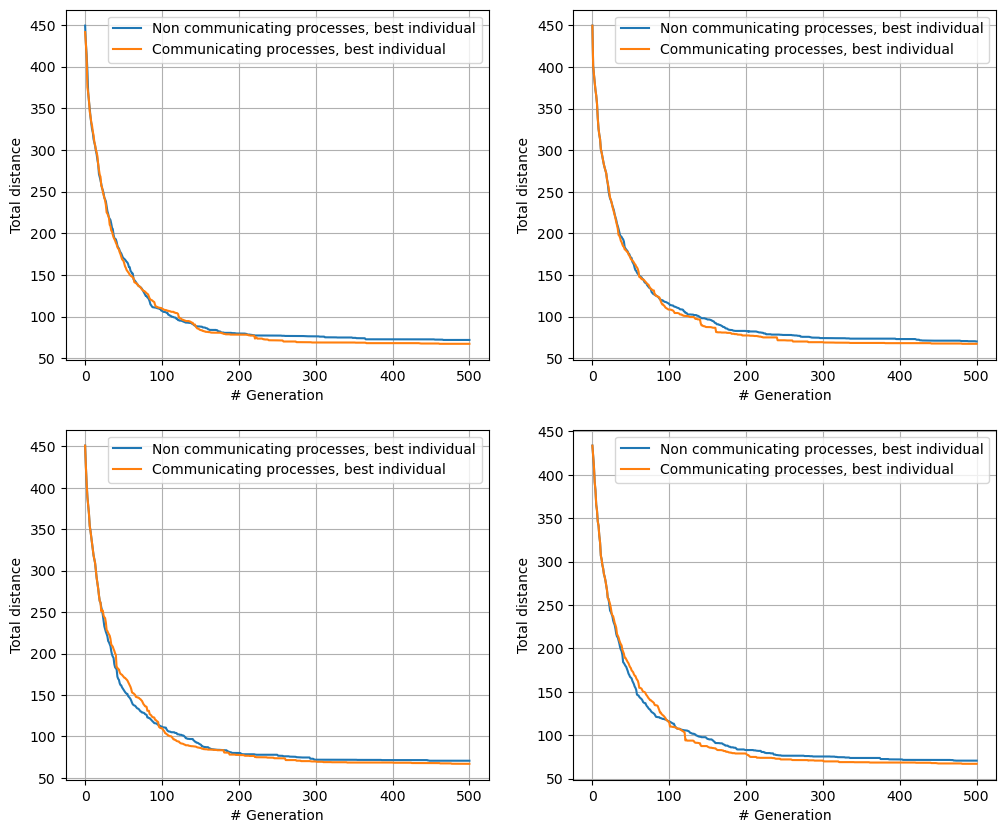

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    best=np.loadtxt('DATA/with_migration/best_individual_'+str(i)+'.dat')
    best_nocomm=np.loadtxt('DATA/no_migration/best_individual_'+str(i)+'.dat')
    x=np.arange(best.size)
    
    make_graph(axs[axs_tags[i]], x, best_nocomm)
    axs[axs_tags[i]].plot(x, best, label='Communicating processes, best individual')
    axs[axs_tags[i]].legend()
    print(best[best.size-1])
    
plt.show()